In [1]:
## Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
X=np.random.rand(100,1)-0.5
Y=3*X[:,0]**2+0.05*np.random.randn(100)

In [7]:
## Empty dataframe
data=pd.DataFrame()

In [9]:
data['X']=X.reshape(100)
data['Y']=Y
data.head()

,X,Y
0,-0.001879,-0.066973
1,0.486813,0.685955
2,0.020423,0.005986
3,-0.128682,0.059366
4,-0.250341,0.173587


Text(0.5, 1.0, 'X Vs Y')

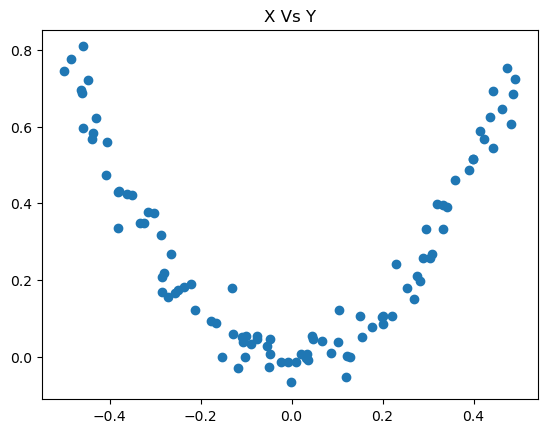

In [11]:
## Visualizing the data
plt.scatter(data['X'],data['Y'])
plt.title('X Vs Y')

##### Applying Gradient Boosting

In [12]:
## M1 is not a model but just the mean of target column
data['pred1']=data['Y'].mean()
data.head()

,X,Y,pred1
0,-0.001879,-0.066973,0.270422
1,0.486813,0.685955,0.270422
2,0.020423,0.005986,0.270422
3,-0.128682,0.059366,0.270422
4,-0.250341,0.173587,0.270422


In [13]:
## Calculate Residual i.e. actual Y -Pred1
data['res1']=data['Y']-data['pred1']
data.head()

,X,Y,pred1,res1
0,-0.001879,-0.066973,0.270422,-0.337395
1,0.486813,0.685955,0.270422,0.415532
2,0.020423,0.005986,0.270422,-0.264437
3,-0.128682,0.059366,0.270422,-0.211056
4,-0.250341,0.173587,0.270422,-0.096835


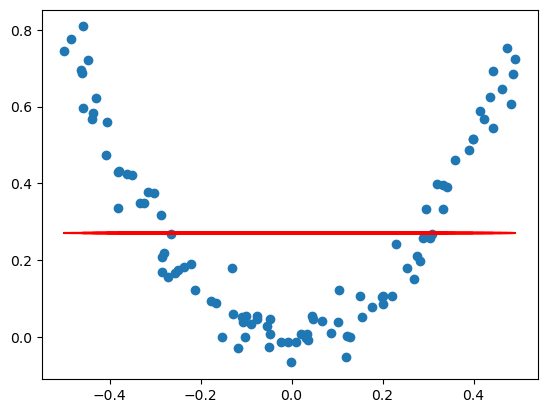

In [14]:
## Lets see how well M1 prediction works
plt.scatter(data['X'],data['Y'])
plt.plot(data['X'],data['pred1'],color='red')

This is a clear case of underfitting.

In [18]:
## M2 will be a decision tree which will be trained on X and res1.
## Unlike adaboost,gradient boosting will not use decision tree stumps rather somewhat larger decision tress are used whose
## leaf nodes lies between 8 to 32.
from sklearn.tree import DecisionTreeRegressor
dt1=DecisionTreeRegressor(max_leaf_nodes=8)

## Training
dt1.fit(data['X'].values.reshape(100,1),data['res1'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

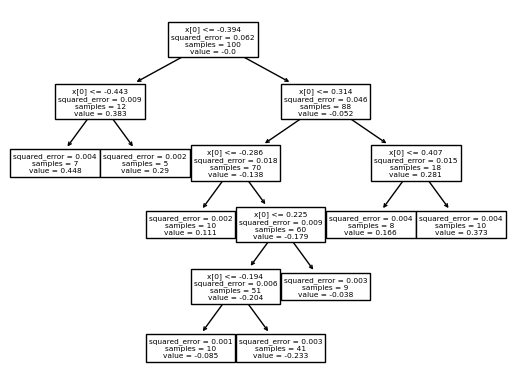

In [20]:
## Plot tree
from sklearn.tree import plot_tree
plot_tree(dt1)
plt.show()

In [21]:
## Generating X_test
X_test=np.linspace(-0.5,0.5,500)

In [33]:
## y_pred=M1+ learning_rate * M2
y_pred=0.270422 + 0.1*(dt1.predict(X_test.reshape(500,1)))

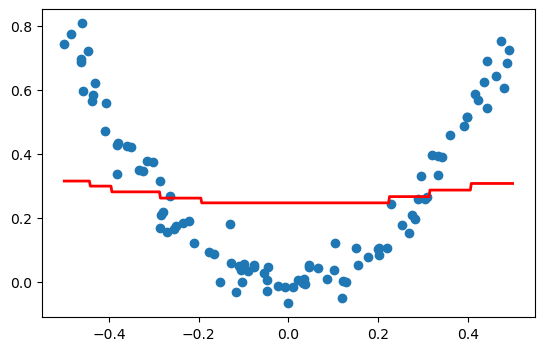

In [34]:
## Visualize the prediction
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(X_test,y_pred,linewidth=2,color='red')
plt.scatter(data['X'],data['Y'])

In [36]:
## Calculate Pred2 i.e. Final output of stage1 and stage2
data['pred2']=0.2704220+0.1*(dt1.predict(data['X'].values.reshape(100,1)))
data.head()

,X,Y,pred1,res1,pred2
0,-0.001879,-0.066973,0.270422,-0.337395,0.247081
1,0.486813,0.685955,0.270422,0.415532,0.307712
2,0.020423,0.005986,0.270422,-0.264437,0.247081
3,-0.128682,0.059366,0.270422,-0.211056,0.247081
4,-0.250341,0.173587,0.270422,-0.096835,0.261944


In [37]:
## For 3rd model we need res2.
## Calculate res2
data['res2']=data['Y']-data['pred2']
data.head()

,X,Y,pred1,res1,pred2,res2
0,-0.001879,-0.066973,0.270422,-0.337395,0.247081,-0.314054
1,0.486813,0.685955,0.270422,0.415532,0.307712,0.378242
2,0.020423,0.005986,0.270422,-0.264437,0.247081,-0.241095
3,-0.128682,0.059366,0.270422,-0.211056,0.247081,-0.187714
4,-0.250341,0.173587,0.270422,-0.096835,0.261944,-0.088356


We could see that res2< res1. This means residual(error) is decreasing with increasing number of models.

In [38]:
## Train M3 on X and res2.
dt2=DecisionTreeRegressor(max_leaf_nodes=8)

## Training
dt2.fit(data['X'].values.reshape(100,1),data['res2'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

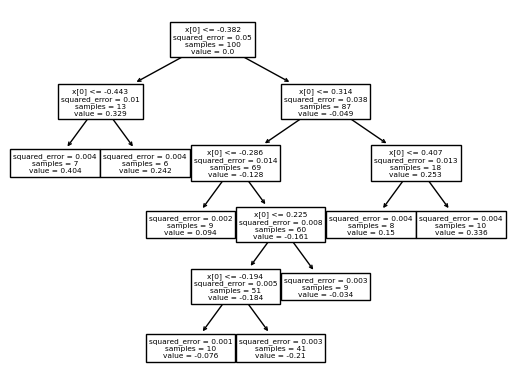

In [39]:
## plot Decision Tree 2 i.e. M3
plot_tree(dt2)
plt.show()

In [40]:
y_pred=0.270422 + 0.1*(dt1.predict(X_test.reshape(500,1)))+0.1*(dt2.predict(X_test.reshape(500,1)))
## Same can be written as below. With below learning rate is getting initialized to 1. Below will converge faster.
y_pred=0.270422 + sum(regressor.predict(X_test.reshape(-1,1)) for regressor in [dt1,dt2])

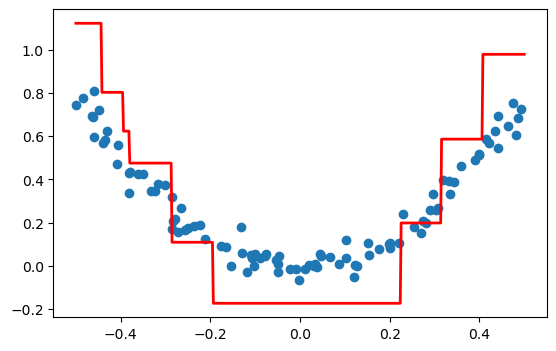

In [41]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(X_test,y_pred,linewidth=2,color='red')
plt.scatter(data['X'],data['Y'])

In [42]:
## Creating Recursive function for applying gradient boosting.
def gradient_boost(X,y,number,lr,count=1,regs=[],foo=None):

  if number == 0:
    return 
  else:
    # do gradient boosting

    if count > 1:
      y = y - regs[-1].predict(X)
    else:
      foo = y

    tree_reg = DecisionTreeRegressor(max_depth=5, random_state=42)
    tree_reg.fit(X, y)

    regs.append(tree_reg)

    x1 = np.linspace(-0.5, 0.5, 500)
    y_pred = sum(lr * regressor.predict(x1.reshape(-1, 1)) for regressor in regs)

    print(number)
    plt.figure()
    plt.plot(x1, y_pred, linewidth=2)
    plt.plot(X[:, 0], foo,"r.")
    plt.show()

    gradient_boost(X,y,number-1,lr,count+1,regs,foo=foo)

5


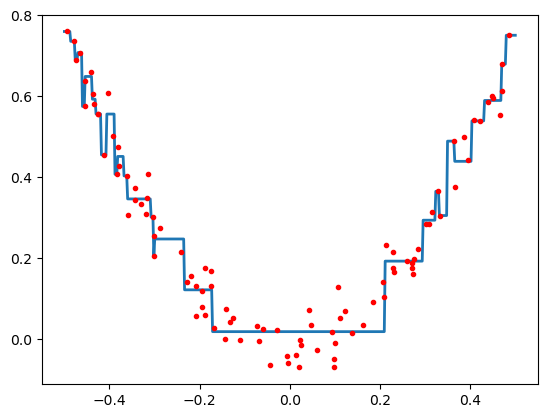

4


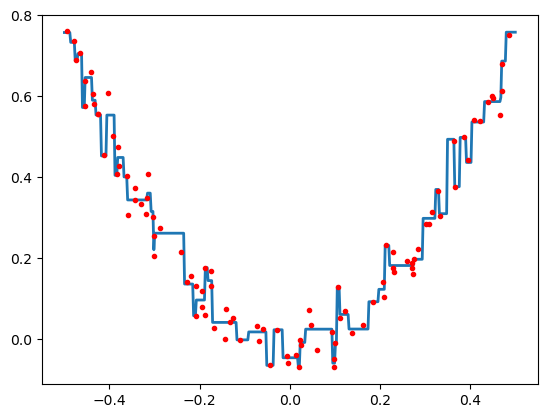

3


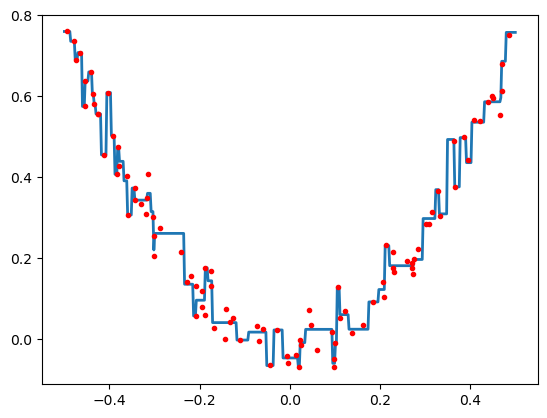

2


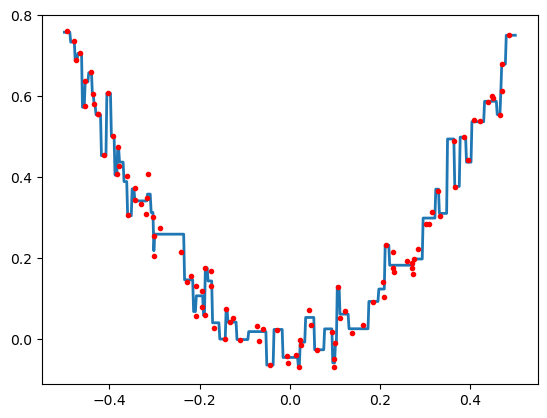

1


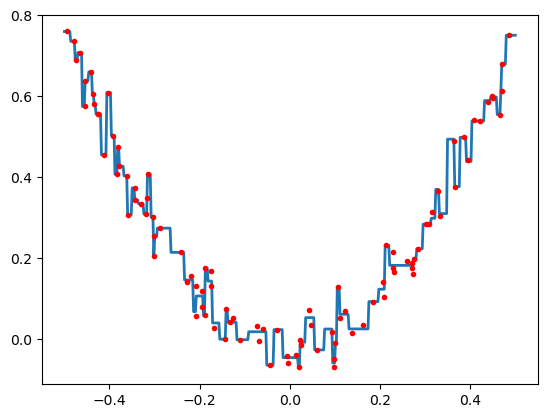

In [43]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)
gradient_boost(X,y,5,lr=1)

Here we wanted 5 decision trees. Initailly we could see model is underfitted, then after adding few model its accuracy is increased but with more increase in model is leading to overfitting situation.